# StringIO

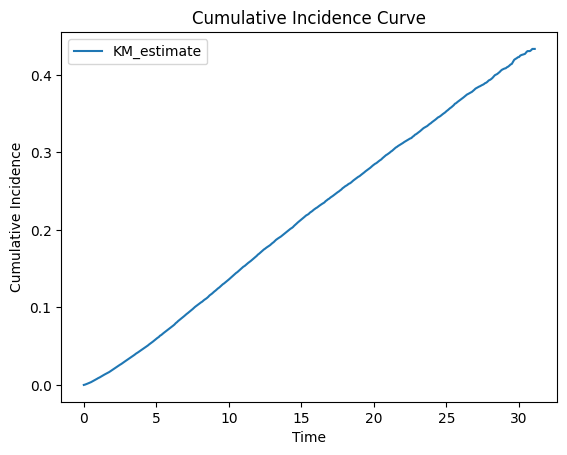

                            coef  exp(coef)  se(coef)  coef lower 95%   
covariate                                                               
age                     0.078777   1.081963  0.000771        0.077266  \
female                 -0.301306   0.739851  0.018590       -0.337742   
C(racecat)[T.Hispanic] -0.344334   0.708692  0.026958       -0.397170   
C(racecat)[T.Other]    -0.588248   0.555299  0.053390       -0.692891   
C(racecat)[T.White]    -0.096496   0.908014  0.022179       -0.139966   
dm                      0.449453   1.567455  0.022127        0.406086   
htn                     0.146603   1.157894  0.018137        0.111055   
acr                     0.000006   1.000006  0.000002        0.000003   
hba1c                  -0.000007   0.999993  0.000008       -0.000023   
egfr                   -0.004161   0.995848  0.000426       -0.004996   
sbp                     0.001695   1.001697  0.000189        0.001325   

                        coef upper 95%  exp(coef) 

In [15]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Import the CSV file
data = pd.read_csv('~/dropbox/0g.κοσμογονία,γ/2.pantheon/ds4ph.capstone.csv')

# Create Kaplan-Meier survival curves
kmf = KaplanMeierFitter()

# Define the survival time and event columns
time_column = 'years'  # Replace with the actual column name in your CSV
event_column = 'died'  # Replace with the actual column name in your CSV

# Fit the Kaplan-Meier estimator
kmf.fit(data[time_column], data[event_column])

# Plot the cumulative incidence (1 - KM)
cumulative_incidence = 1 - kmf.survival_function_
cumulative_incidence.plot()
plt.xlabel('Time')
plt.ylabel('Cumulative Incidence')
plt.title('Cumulative Incidence Curve')
plt.show()

# Perform Cox regression
cph = CoxPHFitter()

# Define the covariate columns
covariates = ['age', 'female', 'racecat', 'dm', 'htn', 'acr', 'hba1c', 'egfr', 'sbp']  # Replace with the actual column names in your CSV

# Fit the Cox regression model
cph.fit(data, duration_col=time_column, event_col=event_column, formula='age + female + C(racecat) + dm + htn + acr + hba1c + egfr + sbp')

# Print the summary
print(cph.summary)

# Calculate the number of observations
n_obs = int(cph._model.weights.sum())
print("Number of observations:", n_obs)


Here is a basic implementation of a Streamlit app called capstone.py that produces a calculator to estimate the 30-year risk of mortality in healthy living kidney donor candidates:

In [16]:
import pandas as pd
from lifelines import CoxPHFitter
import pickle

# Import the CSV file
data = pd.read_csv('~/dropbox/0g.κοσμογονία,γ/2.pantheon/ds4ph.capstone.csv')

# Perform Cox regression
cph = CoxPHFitter()

# Define the covariate columns
covariates = ['age', 'female', 'racecat', 'dm', 'htn', 'acr', 'hba1c', 'egfr', 'sbp']

# Fit the Cox regression model
cph.fit(data, duration_col='years', event_col='died', formula=' + '.join(covariates))

# Save the trained model and beta coefficients
with open('model.pkl', 'wb') as file:
    pickle.dump(cph, file)

with open('betas.pkl', 'wb') as file:
    pickle.dump(cph.summary['coef'].values, file)

# Print the summary
print(cph.summary)

# Calculate the number of observations
n_obs = int(cph._model.weights.sum())
print("Number of observations:", n_obs)


                         coef  exp(coef)  se(coef)  coef lower 95%   
covariate                                                            
age                  0.078777   1.081963  0.000771        0.077266  \
female              -0.301306   0.739851  0.018590       -0.337742   
racecat[T.Hispanic] -0.344334   0.708692  0.026958       -0.397170   
racecat[T.Other]    -0.588248   0.555299  0.053390       -0.692891   
racecat[T.White]    -0.096496   0.908014  0.022179       -0.139966   
dm                   0.449453   1.567455  0.022127        0.406086   
htn                  0.146603   1.157894  0.018137        0.111055   
acr                  0.000006   1.000006  0.000002        0.000003   
hba1c               -0.000007   0.999993  0.000008       -0.000023   
egfr                -0.004161   0.995848  0.000426       -0.004996   
sbp                  0.001695   1.001697  0.000189        0.001325   

                     coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%   
covariat

In [17]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load the model and beta coefficients
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
    
with open('betas.pkl', 'rb') as file:
    betas = pickle.load(file)

# Define a function to calculate the risk of mortality
def calculate_risk(demographic, history, exam, labs):
    # Combine all input features into a single array
    features = np.concatenate([demographic, history, exam, labs])
    
    # Calculate the log hazard ratio using the beta coefficients
    log_hr = np.sum(features * betas)
    
    # Calculate the absolute risk using the Cox proportional hazards formula
    risk = np.exp(log_hr) * baseline_risk
    
    return risk

# Define the baseline risk for a healthy individual
baseline_risk = 0.0028

# Define the input fields for the calculator
age = st.slider('Age', 18, 100, 5)
female = st.selectbox('Sex', ['Male', 'Female'])
racecat = st.selectbox('Race', ['Hispanic', 'Other', 'White'])
dm = st.checkbox('Diabetes')
htn = st.checkbox('Hypertension')
acr = st.slider('ACR', 0.0, 100.0, 0.0)
hba1c = st.slider('HbA1c', 0.0, 20.0, 5.0)
egfr = st.slider('eGFR', 0, 200, 100)
sbp = st.slider('SBP', 50, 250, 120)

# Convert categorical variables to one-hot encoding
if female == 'Male':
    sex_male = 1
else:
    sex_male = 0
    
if racecat == 'Hispanic':
    race_hispanic = 1
    race_other = 0
    race_white = 0
elif racecat == 'Other':
    race_hispanic = 0
    race_other = 1
    race_white = 0
else:
    race_hispanic = 0
    race_other = 0
    race_white = 1

# Combine all input features into a single array
demographic = np.array([age, sex_male, race_hispanic, race_other, race_white])
history = np.array([int(dm), int(htn)])
exam = np.array([sbp])
labs = np.array([acr,hba1c, egfr])  # Add any additional lab features here if needed

# Calculate the risk of mortality using the input features
risk = calculate_risk(demographic, history, exam, labs)

# Display the calculated risk
st.write('30-Year Risk of Mortality:', risk)
